In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read preprocessed dataset
preprocess = pd.read_csv('../ProjectDM/Pre-processed_Airline_Passenger_Satisfaction.csv')


# Map string values in 'satisfaction' column to numerical values
preprocess['satisfaction'] = preprocess['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# Drop non-numeric columns (if any)
X = preprocess.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'])

# Define target variable
y = preprocess['satisfaction']

# Define different partition sizes
partition_sizes = [0.7, 0.8, 0.9]

# Define attribute selection measures
attribute_selection_measures = ['entropy', 'gini']

# Loop through partition sizes
for size in partition_sizes:
    print(f"\nPartition size: {size}")
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Loop through attribute selection measures
    for measure in attribute_selection_measures:
        print(f"\nAttribute selection measure: {measure}")
        
        # Initialize Decision Tree classifier
        clf = DecisionTreeClassifier(criterion=measure, random_state=42)
        
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Predict the test set
        y_pred = clf.predict(X_test)
        
        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")



Partition size: 0.7

Attribute selection measure: entropy
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-score: 0.84

Attribute selection measure: gini
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-score: 0.82

Partition size: 0.8

Attribute selection measure: entropy
Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1-score: 0.84

Attribute selection measure: gini
Accuracy: 0.82
Precision: 0.83
Recall: 0.82
F1-score: 0.82

Partition size: 0.9

Attribute selection measure: entropy
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1-score: 0.80

Attribute selection measure: gini
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-score: 0.78


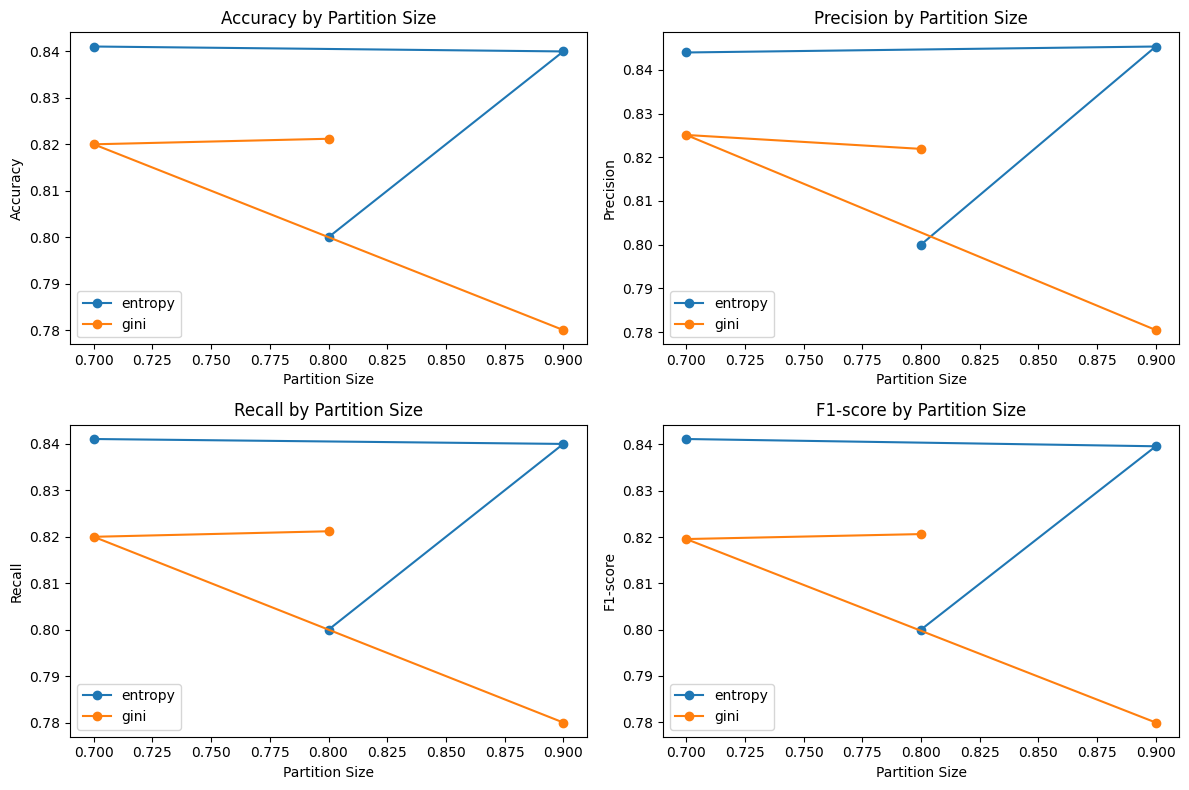

In [16]:
# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through partition sizes
for size in partition_sizes:
    # Initialize empty lists for each metric
    accuracy_partition = []
    precision_partition = []
    recall_partition = []
    f1_partition = []
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Loop through attribute selection measures
    for measure in attribute_selection_measures:
        # Initialize Decision Tree classifier
        clf = DecisionTreeClassifier(criterion=measure, random_state=42)
        
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Predict the test set
        y_pred = clf.predict(X_test)
        
        # Calculate performance metrics
        accuracy_partition.append(accuracy_score(y_test, y_pred))
        precision_partition.append(precision_score(y_test, y_pred, average='weighted'))
        recall_partition.append(recall_score(y_test, y_pred, average='weighted'))
        f1_partition.append(f1_score(y_test, y_pred, average='weighted'))
    
    # Append average scores for the partition
    accuracy_scores.append(accuracy_partition)
    precision_scores.append(precision_partition)
    recall_scores.append(recall_partition)
    f1_scores.append(f1_partition)

# Convert results to DataFrame for visualization
results_df = pd.DataFrame({
    'Partition Size': partition_sizes * len(attribute_selection_measures),
    'Attribute Selection Measure': attribute_selection_measures * len(partition_sizes),
    'Accuracy': [score for sublist in accuracy_scores for score in sublist],
    'Precision': [score for sublist in precision_scores for score in sublist],
    'Recall': [score for sublist in recall_scores for score in sublist],
    'F1-score': [score for sublist in f1_scores for score in sublist]
})

# Plot performance metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for measure, group in results_df.groupby('Attribute Selection Measure'):
    plt.plot(group['Partition Size'], group['Accuracy'], marker='o', label=measure)
plt.title('Accuracy by Partition Size')
plt.xlabel('Partition Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
for measure, group in results_df.groupby('Attribute Selection Measure'):
    plt.plot(group['Partition Size'], group['Precision'], marker='o', label=measure)
plt.title('Precision by Partition Size')
plt.xlabel('Partition Size')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 2, 3)
for measure, group in results_df.groupby('Attribute Selection Measure'):
    plt.plot(group['Partition Size'], group['Recall'], marker='o', label=measure)
plt.title('Recall by Partition Size')
plt.xlabel('Partition Size')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 2, 4)
for measure, group in results_df.groupby('Attribute Selection Measure'):
    plt.plot(group['Partition Size'], group['F1-score'], marker='o', label=measure)
plt.title('F1-score by Partition Size')
plt.xlabel('Partition Size')
plt.ylabel('F1-score')
plt.legend()

plt.tight_layout()
plt.show()


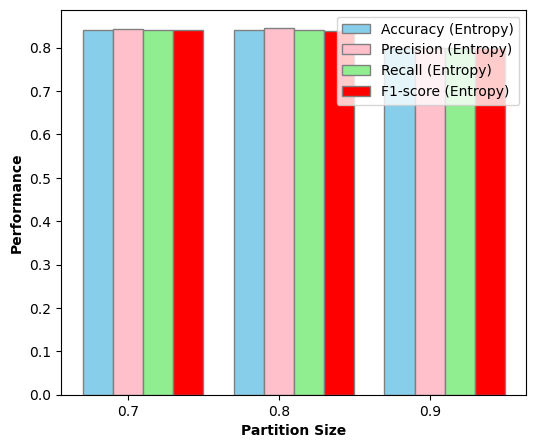

In [9]:
# Grouped bar plot
barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(partition_sizes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.figure(figsize=(6, 5))
plt.bar(r1, results_df[results_df['Attribute Selection Measure']=='entropy']['Accuracy'], color='skyblue', width=barWidth, edgecolor='grey', label='Accuracy (Entropy)')
plt.bar(r2, results_df[results_df['Attribute Selection Measure']=='entropy']['Precision'], color='pink', width=barWidth, edgecolor='grey', label='Precision (Entropy)')
plt.bar(r3, results_df[results_df['Attribute Selection Measure']=='entropy']['Recall'], color='lightgreen', width=barWidth, edgecolor='grey', label='Recall (Entropy)')
plt.bar(r4, results_df[results_df['Attribute Selection Measure']=='entropy']['F1-score'], color='red', width=barWidth, edgecolor='grey', label='F1-score (Entropy)')

# Add xticks on the middle of the group bars
plt.xlabel('Partition Size', fontweight='bold')
plt.ylabel('Performance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(partition_sizes))], partition_sizes)

# Create legend & Show graphic
plt.legend()
plt.show()


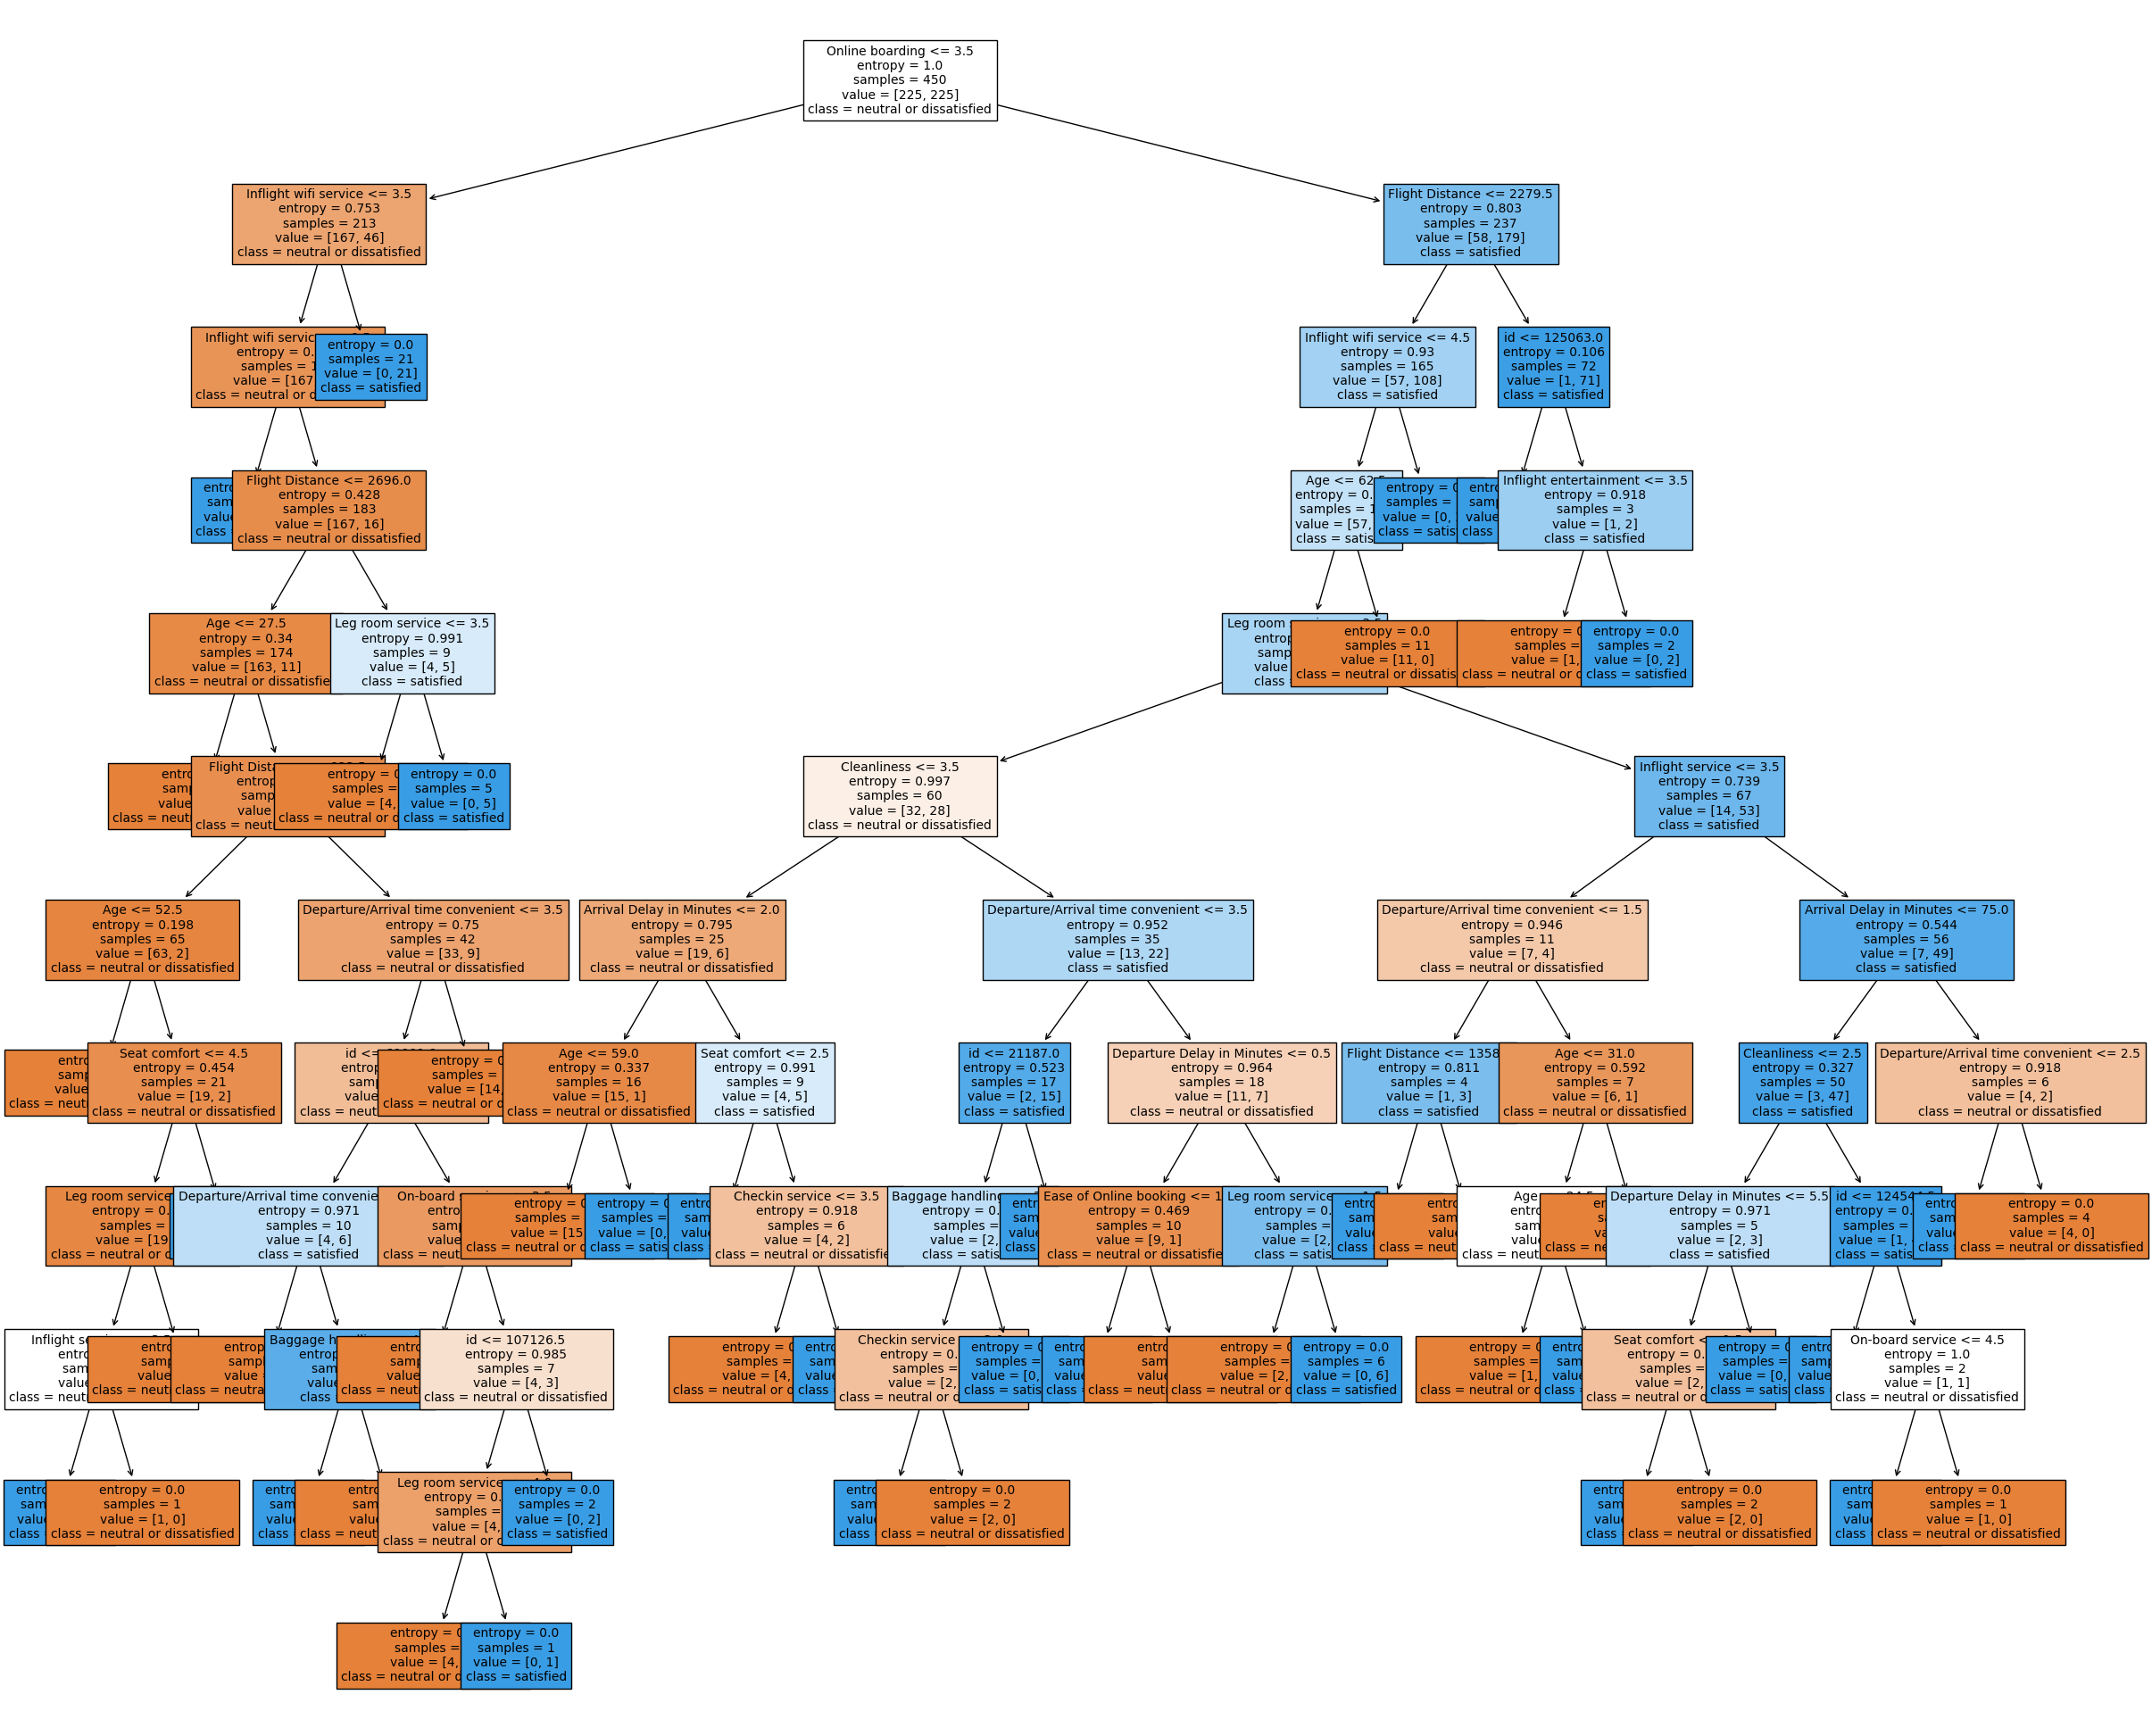

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(30,25))  # Set the figure size
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['neutral or dissatisfied', 'satisfied'], fontsize=10)
plt.savefig('decision_tree.png')  # Save the plot as an image file
plt.show()
